In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from acquire import get_mallcustomer_data
from summarize import df_summary
from prepare import data_prep
seed = 123

In [5]:
df_mall = get_mallcustomer_data()
df_tips = sns.load_dataset('tips')
train, test = train_test_split(df_mall, random_state = seed)

In [4]:
import env

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


df = pd.read_sql('''
                 SELECT p2.bathroomcnt, p2.bedroomcnt, p2.calculatedfinishedsquarefeet, 
                 p2.latitude, p2.longitude, p2.regionidcounty, p2.taxvaluedollarcnt, 
                 p2.landtaxvaluedollarcnt, p1.logerror
                    FROM predictions_2016 p1
                    LEFT JOIN properties_2016 p2  USING(parcelid)
                    WHERE bedroomcnt > 0 AND bathroomcnt > 0 AND unitcnt = 1 
                    AND latitude IS NOT NULL AND longitude IS NOT NULL;
                    '''
                 , get_connection('zillow'))

df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,regionidcounty,taxvaluedollarcnt,landtaxvaluedollarcnt,logerror
0,2.0,3.0,1684.0,34280990.0,-118488536.0,3101.0,360170.0,237416.0,0.0276
1,3.0,2.0,2217.0,34136312.0,-118175032.0,3101.0,119906.0,57912.0,-0.0040
2,2.0,2.0,839.0,33755800.0,-118309000.0,3101.0,244880.0,73362.0,0.0218
3,4.0,4.0,3067.0,33870089.0,-118402768.0,3101.0,2447951.0,1567301.0,-0.2705
4,1.0,2.0,1297.0,33899475.0,-118212720.0,3101.0,111521.0,46972.0,0.0440


In [16]:
train_z, test_z = train_test_split(df, test_size=.5, random_state = seed)

In [6]:
df_mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


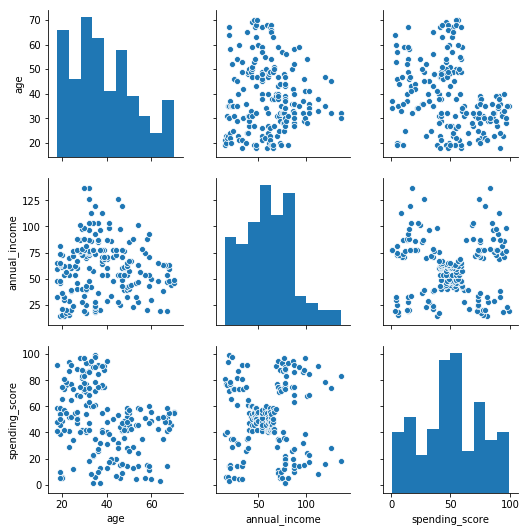

In [8]:
sns.pairplot(df_mall)

In [9]:
stats.ttest_ind(df_mall[df_mall.age < 30].spending_score.dropna(),
               df_mall[df_mall.age > 40].spending_score.dropna())

Ttest_indResult(statistic=6.334039100923398, pvalue=3.5271336721518864e-09)

In [32]:
stats.ttest_ind(df[df.bedroomcnt > 4].logerror.dropna(),
               df[df.bedroomcnt == 3].logerror.dropna())

Ttest_indResult(statistic=6.8646689722942895, pvalue=6.814926614194736e-12)

In [26]:
r, pval = stats.pearsonr(df_mall.age, df_mall.annual_income)

(-0.01239804273606013, 0.8616748930180356)

In [27]:
df_mall['spending_bin'] = pd.qcut(df_mall.spending_score, 4, labels=False)

In [29]:
tbl = pd.crosstab(df_mall['gender'], df_mall['spending_bin'])
tbl

stat, p, dof, expected = stats.chi2_contingency(tbl)

In [30]:
p

0.6645698768314909

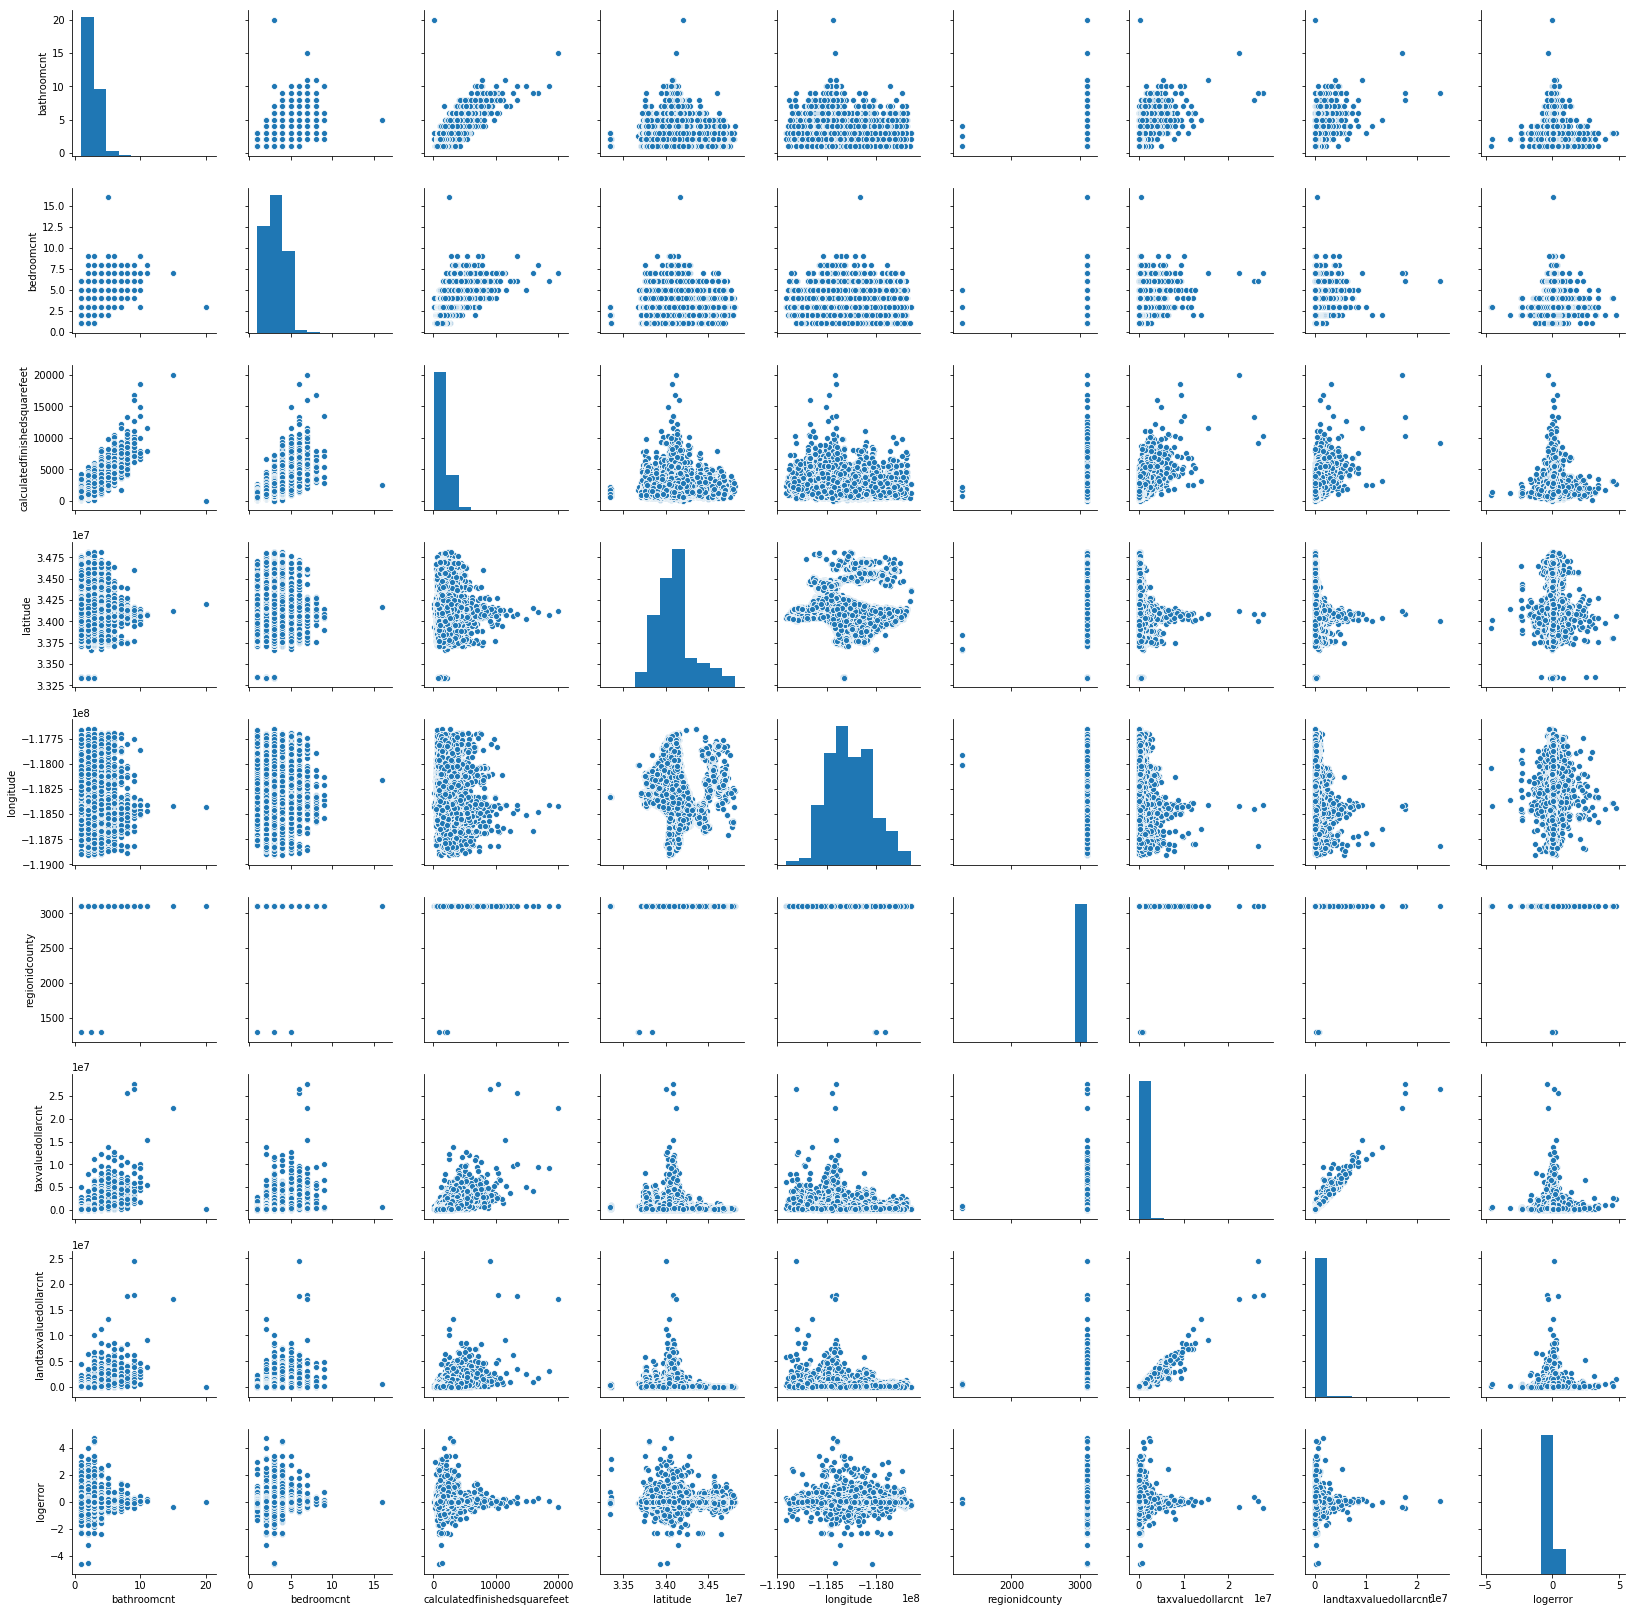

In [10]:
sns.pairplot(df)

In [18]:
train_z['logerror_bin'] = pd.qcut(train_z.logerror, 4, labels=False)

In [22]:
# df_mall.head()
df_mall['age_bin'] = pd.qcut(df_mall.age, 4, labels=False)

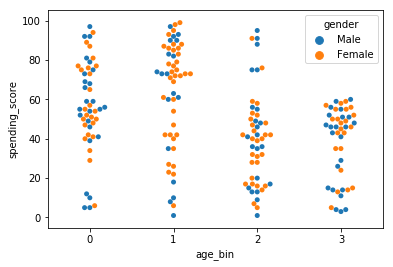

In [23]:
sns.swarmplot(x="age_bin", y="spending_score", data=df_mall, hue='gender')

In [24]:
num_cols = df_mall.select_dtypes('number').columns

Index(['age', 'annual_income', 'spending_score', 'age_bin'], dtype='object')

In [25]:
train_z.select_dtypes('number').columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude',
       'longitude', 'regionidcounty', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'logerror', 'logerror_bin'],
      dtype='object')